In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('dark_background')
import data
import trend_filtering

Using TensorFlow backend.
/accounts/grad/xsli/.local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/accounts/grad/xsli/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
df = data.get_data(use_processed=True, acc_thresh=0.95) # all_data=True
outcome = 'y_consec_thresh'
df = df[df['valid']]

In [21]:
for i in range(len(df)):
    df['X_tf'].iloc[i] = trend_filtering.trend_filtering(y=df['X'].iloc[i], vlambda=np.mean(df['X'].iloc[i])*0.5, order=1) 

Text(0, 0.5, 'X_mean')

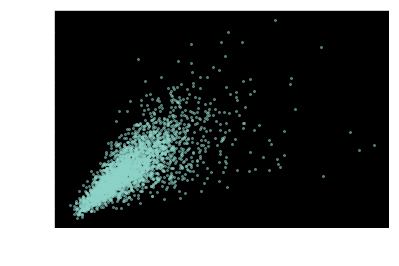

In [22]:
mse = [np.sqrt(np.var(df['X_tf'].iloc[i] - df['X'].iloc[i])) for i in range(len(df))]
plt.scatter(mse, df['X_mean'], alpha=.5, s=4)
plt.xlabel("SD of additive 'noise' ")
plt.ylabel("X_mean")

Text(0.5, 1.0, 'order 3 trend filtering')

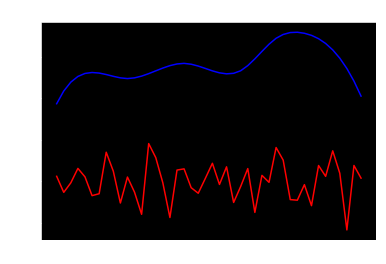

In [20]:
i = 5
plt.plot(df['X'].iloc[i] - df['X_tf'].iloc[i], color='red')
plt.plot(df['X_tf'].iloc[i], color='blue')
plt.title("order 3 trend filtering")

In [18]:
len(df)

1716

(0, 40)

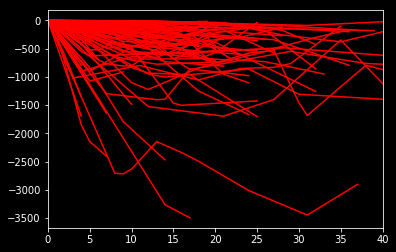

In [87]:
neg = np.where(df_tf[outcome] == False)[0]
for i in range(100):
    X_tf = df_tf['X'].iloc[neg[i]]
    tf_max = np.argmax(X_tf)
    plt.plot(np.array(X_tf[tf_max:])-X_tf[tf_max], color='red')
plt.xlim((0, 40))

(0, 40)

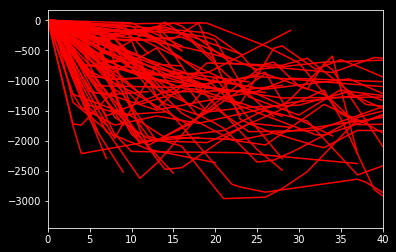

In [88]:
pos = np.where(df_tf[outcome] == True)[0]
for i in range(100):
    X_tf = df_tf['X'].iloc[pos[i]]
    tf_max = np.argmax(X_tf)
    plt.plot(np.array(X_tf[tf_max:])-X_tf[tf_max], color='red')
plt.xlim((0, 40))

In [191]:
pos = np.where(df_tf[outcome] == True)[0]
pos_hist = np.zeros(6)
for i in range(len(pos)):
    X_tf = df_tf['X'].iloc[pos[i]]
    tf_max = np.argmax(X_tf)
    diff = X_tf[min(tf_max+10, len(X_tf)-1):] - X_tf[tf_max]
    for j in range(len(diff)):
        nbin = np.floor((np.abs(diff[j]))/250)
        pos_hist[min(np.int(nbin), 5)] += 1/len(diff)


In [192]:
pos_hist/sum(pos_hist)

array([0.113455  , 0.16491701, 0.20113871, 0.14375879, 0.13113755,
       0.24559294])

In [193]:
neg = np.where(df_tf[outcome] == False)[0]
neg_hist = np.zeros(6)
for i in range(len(neg)):
    X_tf = df_tf['X'].iloc[neg[i]]
    tf_max = np.argmax(X_tf)
    diff = X_tf[min(tf_max+10, len(X_tf)-1):] - X_tf[tf_max]
    for j in range(len(diff)):
        nbin = np.floor((np.abs(diff[j]))/250)
        neg_hist[min(np.int(nbin), 5)] += 1/len(diff)

In [194]:
neg_hist/sum(neg_hist)

array([0.36615859, 0.24369449, 0.15182007, 0.09811032, 0.03582263,
       0.10439391])